In [20]:
# -------------------------------------------------------------
# Sentiment Analysis and Stock Data Script
# -------------------------------------------------------------
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import requests  # For making HTTP requests to the stock screener API
import os  # For accessing environment variables
import json  # For handling JSON data
from dotenv import load_dotenv  # For loading environment variables from a .env file
import matplotlib.pyplot as plt  # For plotting
import warnings  # For ignoring warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Suppress warnings
warnings.filterwarnings("ignore")

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Load environment variables from a .env file
load_dotenv()

# Read the Financial Modeling Prep (FMP) API key from the environment variables
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [22]:
# -------------------------------------------------------------
# Specify Stock Ticker
# -------------------------------------------------------------
company = 'META'  # Specify the stock ticker symbol

In [23]:
# -------------------------------------------------------------
# Article Sentiment
# -------------------------------------------------------------
# Construct the API URL to fetch company articles
url = f'https://financialmodelingprep.com/api/v3/stock_news?tickers={company}&limit=100&apikey={FMP_API_KEY}'

# Make a request to the API to get the articles
articles = requests.get(url).json()

# Convert the articles into a DataFrame
articles = pd.DataFrame(articles)

# Convert the published date to datetime format
articles['publishedDate'] = pd.to_datetime(articles['publishedDate'])

# Display the articles
articles

,symbol,publishedDate,title,image,site,text,url
0,META,2025-12-25 03:55:00,Billionaires Are Buying an AI Stock That Could Be the Apple of the 2030s,https://images.financialmodelingprep.com/news/billionaires-are-buying-an-ai-stock-that-could-be-20251225.jpg,fool.com,"Meta recently debuted its first pair of augmented reality smart glasses, a stepping stone along a roadmap that leads to fully-immersive glasses powered by superintelligence. Just as smartphones have replaced personal computers for many tasks, Mark Zuckerberg says smart glasses will displace smartphones as our primary computing devices in the future.",https://www.fool.com/investing/2025/12/25/billionaires-buy-ai-stocks-could-be-apple-2030s/
1,META,2025-12-24 13:41:35,"Why Amazon, Meta, Mercado Libre and Doordash are this analyst's top internet stock picks",https://images.financialmodelingprep.com/news/why-amazon-meta-mercado-libre-and-doordash-are-this-20251224.jpg,youtube.com,"Wedbush Securities managing director of equity research Scott Devitt sits down with Market Catalysts host Ines Ferré to outline his top three consumer internet stock picks: MercadoLibre, DoorDash, and Meta Platforms. Devitt goes on to explain the growth drivers he is seeing for Meta in 2026.",https://www.youtube.com/watch?v=n6IgUEPG2dU
2,META,2025-12-24 12:20:13,META's $75B AI Bet: Patience and Metrics for 2026 Investors,https://images.financialmodelingprep.com/news/metas-75b-ai-bet-patience-and-metrics-for-2026-20251224.jpg,youtube.com,Dave Nicholson and Ali Mogharabi dive deep into Meta Platforms (META) and the company's substantial capital expenditure in A.I. They question whether the $75 billion investment will pay off and if Meta has overspent.,https://www.youtube.com/watch?v=MNQL4BIt16Q
3,META,2025-12-24 10:45:00,3 Artificial Intelligence (AI) Trends to Watch in 2026 and How to Invest in Them,https://images.financialmodelingprep.com/news/3-artificial-intelligence-ai-trends-to-watch-in-2026-20251224.jpeg,fool.com,"AI is constantly evolving, and these companies will continue to push it forward in 2026.",https://www.fool.com/investing/2025/12/24/artificial-intelligence-ai-trends-to-watch-in-2026/
4,META,2025-12-24 09:40:34,Italy tells Meta to suspend its policy that bans rival AI chatbots from WhatsApp,https://images.financialmodelingprep.com/news/italy-tells-meta-to-suspend-its-policy-that-bans-20251224.jpg,techcrunch.com,Italy has ordered Meta to suspend its policy that bans companies from using WhatsApp's business tools to offer their own AI chatbots on the popular chat app.,https://techcrunch.com/2025/12/24/italy-tells-meta-to-suspend-its-policy-that-bans-rival-ai-chatbots-from-whatsapp/
...,...,...,...,...,...,...,...
95,META,2025-12-18 09:15:49,China Prepares to Wreck US AI Industry,https://images.financialmodelingprep.com/news/china-prepares-to-wreck-us-ai-industry-20251218.jpg,247wallst.com,There are three ways China is poised to leap ahead in artificial intelligence. The United States faces many headwinds in creating AI infrastructure..,https://247wallst.com/technology-3/2025/12/18/china-prepares-to-wreck-us-ai-industry/
96,META,2025-12-18 08:50:44,Meta Platforms (NASDAQ: META) Stock Price Prediction for 2026: Where Will It Be in 1 Year (Dec 18),https://images.financialmodelingprep.com/news/meta-platforms-nasdaq-meta-stock-price-prediction-for-2026-20251218.jpg,247wallst.com,"This year, one of the better performers among the Magnificent 7 had been Meta Platforms Inc.",https://247wallst.com/investing/2025/12/18/meta-platforms-nasdaq-meta-stock-price-prediction-for-2025-where-will-it-be-in-1-year/
97,META,2025-12-18 07:30:00,Meta: The Market Is Wrong,https://images.financialmodelingprep.com/news/meta-the-market-is-wrong-20251218.jpg,seekingalpha.com,"Meta Platforms (META) delivered another strong dual beat in Q3, with accelerated YoY revenue growth of 26.2% and robust EPS expansion. Q3 saw significant cash from operations growth to $30B, supporting aggressive AI and virtual reality 

In [24]:
# Preview articles with full text
pd.set_option('display.max_colwidth', None)
print(articles['text'])

0                                                                                                             Meta recently debuted its first pair of augmented reality smart glasses, a stepping stone along a roadmap that leads to fully-immersive glasses powered by superintelligence. Just as smartphones have replaced personal computers for many tasks, Mark Zuckerberg says smart glasses will displace smartphones as our primary computing devices in the future.
1                                                                                                                                                                        Wedbush Securities managing director of equity research Scott Devitt sits down with Market Catalysts host Ines Ferré to outline his top three consumer internet stock picks: MercadoLibre, DoorDash, and Meta Platforms. Devitt goes on to explain the growth drivers he is seeing for Meta in 2026.
2                                                                           

In [25]:
# -------------------------------------------------------------
# Calculate Sentiment Scores for Articles
# -------------------------------------------------------------
scores = []
text = articles['text']

# Calculate sentiment scores for each article
for txt in text:
    vs = analyzer.polarity_scores(txt)
    scores.append(vs)

# Create DataFrames for text and sentiment scores
text_df = pd.DataFrame(text, columns=['text'])
scores_df = pd.DataFrame(scores)
sentiment_df = pd.concat([text_df, scores_df], axis=1)

# Combine sentiment scores with original article data
combined_df = pd.concat([sentiment_df, articles], axis=1)
combined_df = combined_df.T.drop_duplicates().T.set_index('publishedDate')

# Display the first row of the combined DataFrame
combined_df

,text,neg,neu,pos,compound,symbol,title,image,site,url
publishedDate,,,,,,,,,,
2025-12-25 03:55:00,"Meta recently debuted its first pair of augmented reality smart glasses, a stepping stone along a roadmap that leads to fully-immersive glasses powered by superintelligence. Just as smartphones have replaced personal computers for many tasks, Mark Zuckerberg says smart glasses will displace smartphones as our primary computing devices in the future.",0.0,0.897,0.103,0.6597,META,Billionaires Are Buying an AI Stock That Could Be the Apple of the 2030s,https://images.financialmodelingprep.com/news/billionaires-are-buying-an-ai-stock-that-could-be-20251225.jpg,fool.com,https://www.fool.com/investing/2025/12/25/billionaires-buy-ai-stocks-could-be-apple-2030s/
2025-12-24 13:41:35,"Wedbush Securities managing director of equity research Scott Devitt sits down with Market Catalysts host Ines Ferré to outline his top three consumer internet stock picks: MercadoLibre, DoorDash, and Meta Platforms. Devitt goes on to explain the growth drivers he is seeing for Meta in 2026.",0.0,0.867,0.133,0.6808,META,"Why Amazon, Meta, Mercado Libre and Doordash are this analyst's top internet stock picks",https://images.financialmodelingprep.com/news/why-amazon-meta-mercado-libre-and-doordash-are-this-20251224.jpg,youtube.com,https://www.youtube.com/watch?v=n6IgUEPG2dU
2025-12-24 12:20:13,Dave Nicholson and Ali Mogharabi dive deep into Meta Platforms (META) and the company's substantial capital expenditure in A.I. They question whether the $75 billion investment will pay off and if Meta has overspent.,0.04,0.909,0.051,0.1027,META,META's $75B AI Bet: Patience and Metrics for 2026 Investors,https://images.financialmodelingprep.com/news/metas-75b-ai-bet-patience-and-metrics-for-2026-20251224.jpg,youtube.com,https://www.youtube.com/watch?v=MNQL4BIt16Q
2025-12-24 10:45:00,"AI is constantly evolving, and these companies will continue to push it forward in 2026.",0.0,1.0,0.0,0.0,META,3 Artificial Intelligence (AI) Trends to Watch in 2026 and How to Invest in Them,https://images.financialmodelingprep.com/news/3-artificial-intelligence-ai-trends-to-watch-in-2026-20251224.jpeg,fool.com,https://www.fool.com/investing/2025/12/24/artificial-intelligence-ai-trends-to-watch-in-2026/
2025-12-24 09:40:34,Italy has ordered Meta to suspend its policy that bans companies from using WhatsApp's business tools to offer their own AI chatbots on the popular chat app.,0.076,0.831,0.093,0.128,META,Italy tells Meta to suspend its policy that bans rival AI chatbots from WhatsApp,https://images.financialmodelingprep.com/news/italy-tells-meta-to-suspend-its-policy-that-bans-20251224.jpg,techcrunch.com,https://techcrunch.com/2025/12/24/italy-tells-meta-to-suspend-its-policy-that-bans-rival-ai-chatbots-from-whatsapp/
...,...,...,...,...,...,...,...,...,...,...
2025-12-18 09:15:49,There are three ways China is poised to leap ahead in artificial intelligence. The United States faces many headwinds in creating AI infrastructure..,0.0,0.653,0.347,0.8442,META,China Prepares to Wreck US AI Industry,https://images.financialmodelingprep.com/news/china-prepares-to-wreck-us-ai-industry-20251218.jpg,247wallst.com,https://247wallst.com/technology-3/2025/12/18/china-prepares-to-wreck-us-ai-industry/
2025-12-18 08:50:44,"This year, one of the better performers among the Magnificent 7 had been Meta Platforms Inc.",0.0,0.657,0.343,0.7783,META,Meta Platforms (NASDAQ: META) Stock Price Prediction for 2026: Where Will It Be in 1 Year (Dec 18),https://images.financialmodelingprep.com/news/meta-platforms-nasdaq-meta-stock-price-prediction-for-2026-20251218.jpg,247wallst.com,https://247wallst.com/investing/2025/12/18/meta-platforms-nasdaq-meta-stock-price-prediction-for-2025-where-will-it-be-in-1-year/
2025-12-18 07:30:00,"Meta Platforms (META) delivered another strong dual beat in Q3, with accelerated YoY revenue growth of 26.2% and robust EPS expansion. Q3 saw significant cash from operations growth to $30

            neg      neu      pos  compound
symbol                                     
META    0.03908  0.83309  0.12785  0.363999


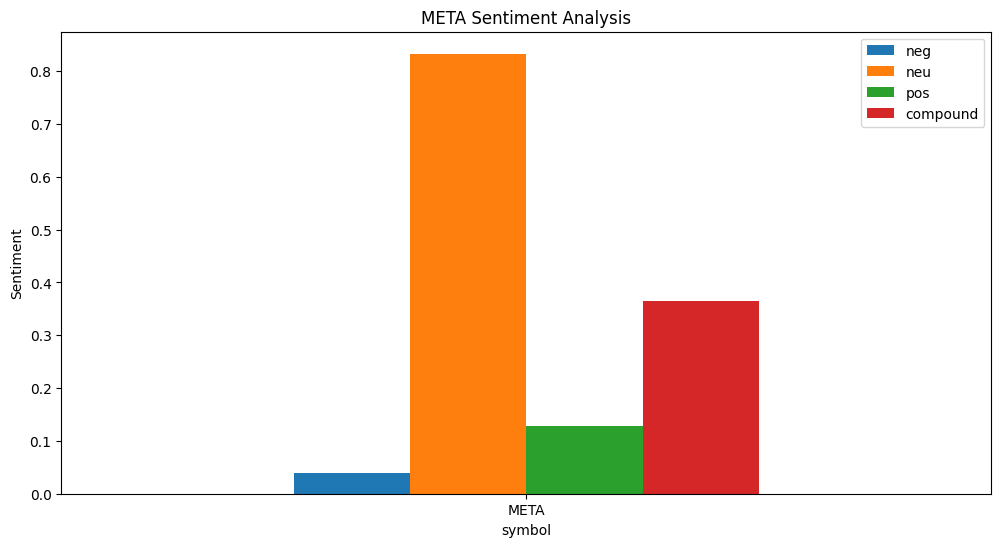

In [26]:
# -------------------------------------------------------------
# Plot Mean Sentiment
# -------------------------------------------------------------
scores_df['symbol'] = company
scores_mean = scores_df.groupby('symbol').mean()
print(scores_mean)

# Plot the mean sentiment scores
scores_mean.plot.bar(figsize=(12, 6), title=f'{company} Sentiment Analysis', ylabel='Sentiment', rot=0)
plt.show()

In [27]:
# -------------------------------------------------------------
# Pull Company Press Releases
# -------------------------------------------------------------
# Construct the API URL to fetch company press releases
url = f'https://financialmodelingprep.com/api/v3/press-releases/{company}?limit=100&apikey={FMP_API_KEY}'

# Make a request to the API to get the press releases
press = requests.get(url).json()

# Convert the press releases into a DataFrame
press = pd.DataFrame(press)

# Display the press release text
press = press.set_index('date')
press

,symbol,title,text
date,,,
2025-12-17 14:52:00,META,SOCIAL MEDIA VICTIMS LAW CENTER LAWSUIT ALLEGES META PRIORITIZED ENGAGEMENT OVER CHILD SAFETY IN INSTAGRAM SEXTORTION DEATHS,"SEATTLE--(BUSINESS WIRE)--THE SOCIAL MEDIA VICTIMS LAW CENTER, A LEGAL ADVOCACY ORGANIZATION SUPPORTING FAMILIES HARMED BY PREDATORY TECH, HAS FILED A WRONGFUL DEATH LAWSUIT AGAINST META PLATFORMS, INC. AND INSTAGRAM OVER THE SEXTORTION-RELATED SUICIDES OF 16‑YEAR‑OLD M.D. FROM DUNBLANE, SCOTLAND, AND 13‑YEAR‑OLD L.M. FROM CUMBERLAND COUNTY, PENNSYLVANIA, WHO DIED TWO DAYS AFTER OPENING HIS INSTAGRAM ACCOUNT. THE LAWSUIT, FILED IN THE SUPERIOR COURT OF THE STATE OF DELAWARE, ALLEGES THAT NEWLY."
2025-12-09 10:00:00,META,ACES PEST CONTROL ANNOUNCES NATIONWIDE ROLLOUT OF META SMART GLASSES TO ENHANCE PEST INSPECTIONS ACROSS AUCKLAND.,"PINPOINTING ROOT CAUSES OF INFESTATIONS FOR FASTER, MORE ACCURATE INSPECTIONS FOR AUCKLAND CUSTOMERS. PINPOINTING ROOT CAUSES OF INFESTATIONS FOR FASTER, MORE ACCURATE INSPECTIONS FOR AUCKLAND CUSTOMERS."
2025-12-03 19:00:00,META,META ANNOUNCES QUARTERLY CASH DIVIDEND,"MENLO PARK, CALIF. , DEC. 3, 2025 /PRNEWSWIRE/ -- THE META PLATFORMS, INC. (NASDAQ: META) BOARD OF DIRECTORS TODAY DECLARED A QUARTERLY CASH DIVIDEND OF $0.525 PER SHARE OF THE COMPANY'S OUTSTANDING CLASS A COMMON STOCK AND CLASS B COMMON STOCK, PAYABLE ON DECEMBER 23, 2025 TO STOCKHOLDERS OF RECORD AS OF THE CLOSE OF BUSINESS ON DECEMBER 15, 2025."
2025-11-26 18:56:00,META,AG META REPORTS INCREASED INVESTOR INQUIRIES AS INTEREST IN REAL-WORLD ASSET TOKENIZATION GROWS,AG META EXPANDS ITS REAL-WORLD ASSET TOKENIZATION INFRASTRUCTURE AS GLOBAL DIGITAL FINANCE ADOPTION CONTINUES TO GROW. AG META EXPANDS ITS REAL-WORLD ASSET TOKENIZATION INFRASTRUCTURE AS GLOBAL DIGITAL FINANCE ADOPTION CONTINUES TO GROW.
2025-11-13 08:00:00,META,STRIKE GRAPH SELECTED FOR AWS AND META'S EXCLUSIVE “BUILDING WITH LLAMA” STARTUP PROGRAM TO SHAPE THE FUTURE OF AI IN COMPLIANCE AND TRUST,"SEATTLE--(BUSINESS WIRE)--STRIKE GRAPH, THE AI-NATIVE COMPLIANCE MANAGEMENT PLATFORM, TODAY ANNOUNCED THAT IT HAS BEEN SELECTED AS ONE OF ONLY 33 STARTUPS NATIONWIDE TO PARTICIPATE IN THE AWS STARTUPS: BUILDING WITH LLAMA PROGRAM—A SIX-MONTH, INVITE-ONLY INITIATIVE FROM AWS AND META DESIGNED TO ACCELERATE INNOVATION WITH LLAMA, META'S OPEN-SOURCE AI ECOSYSTEM. LAUNCHED IN MAY 2025, THE PROGRAM CONNECTS A SELECT GROUP OF STARTUPS ACROSS THE U.S. WITH TOP AI LEADERS AND WORLD-CLASS AI TECHNICAL E."
...,...,...,...
2025-05-15 09:08:00,META,"CHILE SOCIAL COMMERCE MARKET INTELLIGENCE REPORT 2025-2030 FEATURING FACEBOOK, INSTAGRAM, ESCAPESWITHYOU, 360, AND FANTASTIC","THIS REPORT PROVIDES A DETAILED DATA-CENTRIC ANALYSIS OF THE SOCIAL COMMERCE SECTOR IN CHILE, COVERING MARKET OPPORTUNITIES AND RISKS ACROSS A RANGE OF RETAIL CATEGORIES. WITH OVER 50+ KPIS AT THE COUNTRY LEVEL, THIS REPORT PROVIDES A COMPREHENSIVE UNDERSTANDING OF SOCIAL COMMERCE MARKET DYNAMICS, MARKET SIZE AND FORECAST, AND MARKET SHARE STATISTICS. IT BREAKS DOWN MARKET OPPORTUNITIES IN THE SOCIAL COMMERCE SECTOR BY TYPE OF DOMESTIC VS CROSS-BORDER, TYPE OF SOCIAL PLATFORM, TYPE OF PAYMENT METHOD, BUSINESS MODEL, END-USE CONSUMER SEGMENT, AND TYPE OF CITY. IN ADDITION, IT PROVIDES A SNAPSHOT OF CONSUMER BEHAVIOUR AND RETAIL SPENDING DYNAMICS. KPIS IN BOTH VALUE AND VOLUME TERMS HELP IN GETTING AN IN-DEPTH UNDERSTANDING OF END MARKET DYNAMICS. THIS REPORT PROVIDES A DETAILED DATA-CENTRIC ANALYSIS OF THE SOCIAL COMMERCE SECTOR IN CHILE, COVERING MARKET OPPORTUNITIES AND RISKS ACROSS A RANGE OF RETAIL CATEGORIES. WITH OVER 50+ KPIS AT THE COUNTRY LEVEL, THIS REPORT PROVIDES A COMPREHENSIVE UNDERSTANDING OF SOCIAL COMMERCE MARKET DYNAMICS, MARKET SIZE AND FORECAST, AND MARKET SHARE STATISTICS. IT BREAKS DOWN MARKET OPPORTUNITIES IN THE SOCIAL COMMERCE SECTOR BY TYPE OF DOMESTIC VS CROSS-BORDER, TYPE OF SOCIAL PLATFORM, TYPE OF PAYMENT METHOD, BUSINESS MODEL, END-USE CONSUMER SEGMENT, AND TYPE OF CITY. IN ADDITION, IT PROVIDES A SNAPSHOT OF CON

In [28]:
# -------------------------------------------------------------
# Social Sentiment Analysis
# -------------------------------------------------------------
# Absolute index field indicates how much people are talking about the stock, relative index also indicates it but relative to previous day.
# Sentiment field indicates overall percentage of positive activity, while general perception indicates whether people are more positive or negative than usual.
url = f'https://financialmodelingprep.com/api/v4/historical/social-sentiment?symbol={company}&page=0&apikey={FMP_API_KEY}'

# Make a request to the API to get social sentiment data
social_sentiment = requests.get(url).json()

# Convert the social sentiment data into a DataFrame
social_sentiment = pd.DataFrame(social_sentiment)

# Display the first few rows of the social sentiment DataFrame
social_sentiment = social_sentiment.set_index('date')
social_sentiment

,symbol,stocktwitsPosts,twitterPosts,stocktwitsComments,twitterComments,stocktwitsLikes,twitterLikes,stocktwitsImpressions,twitterImpressions,stocktwitsSentiment,twitterSentiment
date,,,,,,,,,,,
2025-12-25 07:00:00,META,1,2,0,0,0,0,73,203,0.50000,0.52771
2025-12-25 06:00:00,META,1,1,0,0,0,0,2,0,0.50000,0.60521
2025-12-25 05:00:00,META,0,0,0,0,0,0,0,0,0.00000,0.00000
2025-12-25 04:00:00,META,1,3,0,0,0,0,0,0,0.50000,0.48535
2025-12-25 03:00:00,META,0,0,0,0,0,0,0,0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-22 00:00:00,META,0,0,0,0,0,0,0,0,0.00000,0.00000
2025-12-21 23:00:00,META,2,3,1,3,1,2,21193,102203,0.52500,0.51998
2025-12-21 22:00:00,META,0,0,0,0,0,0,0,0,0.00000,0.00000


In [29]:
# Average analyst sentiment
social_sentiment.groupby('symbol').mean()

,stocktwitsPosts,twitterPosts,stocktwitsComments,twitterComments,stocktwitsLikes,twitterLikes,stocktwitsImpressions,twitterImpressions,stocktwitsSentiment,twitterSentiment
symbol,,,,,,,,,,
META,9.571429,17.904762,1.964286,91.797619,8.761905,441.72619,22803.928571,455242.285714,0.426814,0.443815


In [30]:
# -------------------------------------------------------------
# Analyst Sentiment Analysis
# -------------------------------------------------------------
# Grades given to companies by hedge funds, investment firms, and analysts. It includes both the previous and new grade.
url = f'https://financialmodelingprep.com/api/v3/grade/{company}?limit=500&apikey={FMP_API_KEY}'

# Make a request to the API to get analyst sentiment data
analyst_sentiment = requests.get(url).json()

# Convert the analyst sentiment data into a DataFrame
analyst_sentiment = pd.DataFrame(analyst_sentiment)

# Set the date as the index
analyst_sentiment = analyst_sentiment.set_index('date')

# Display the analyst sentiment DataFrame
analyst_sentiment

,symbol,gradingCompany,previousGrade,newGrade
date,,,,
2024-09-30,META,Cantor Fitzgerald,Overweight,Overweight
2024-09-30,META,"Monness, Crespi, Hardt",Buy,Buy
2024-09-26,META,JMP Securities,Market Outperform,Market Outperform
2024-09-26,META,B of A Securities,Buy,Buy
2024-09-26,META,Baird,Outperform,Outperform
...,...,...,...,...
2022-02-03,META,UBS,Buy,Buy
2022-02-03,META,Truist Securities,Buy,Buy
2022-01-26,META,RBC Capital,Outperform,Outperform


In [31]:
# -------------------------------------------------------------
# Count Recent Analyst Sentiment (Last Year)
# -------------------------------------------------------------
# Count the number of new grades given in the last year
last_year = str(datetime.now() - pd.DateOffset(years=1))
recent_analyst_sentiment = analyst_sentiment.loc[last_year:]
analyst_sentiment_count = recent_analyst_sentiment.groupby('newGrade').count()

# Display the count of recent analyst sentiment
analyst_sentiment_count

,symbol,gradingCompany,previousGrade
newGrade,,,
Buy,149,149,149
Equal Weight,5,5,5
Hold,8,8,8
Market Outperform,18,18,18
Market Perform,6,6,6
Neutral,25,25,25
Outperform,84,84,84
Overweight,70,70,70
Positive,5,5,5


In [32]:
# -------------------------------------------------------------
# Analyst Estimates
# -------------------------------------------------------------
# Ratings and recommendations from FMP analysts who use CAGR formula to predict and analyze stocks
url = f'https://financialmodelingprep.com/api/v3/analyst-estimates/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get analyst estimates data
analyst_estimates = requests.get(url).json()

# Convert the analyst estimates data into a DataFrame
analyst_estimates = pd.DataFrame(analyst_estimates)

# Set the date as the index
analyst_estimates = analyst_estimates.set_index('date')

# Display the first few rows of the analyst estimates DataFrame
analyst_estimates

,symbol,estimatedRevenueLow,estimatedRevenueHigh,estimatedRevenueAvg,estimatedEbitdaLow,estimatedEbitdaHigh,estimatedEbitdaAvg,estimatedEbitLow,estimatedEbitHigh,estimatedEbitAvg,...,estimatedNetIncomeHigh,estimatedNetIncomeAvg,estimatedSgaExpenseLow,estimatedSgaExpenseHigh,estimatedSgaExpenseAvg,estimatedEpsAvg,estimatedEpsHigh,estimatedEpsLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps
date,,,,,,,,,,,,,,,,,,,,,
2029-12-31,META,338985174371,367369881496,356702385714,150350380110,162939873186,158208509791,123303337954,133628064225,129747841911,...,113330832663,1.090897e+11,64391378342,69783149292,67756822453,41.73286,43.35533,39.03816,37,30
2028-12-31,META,295682671031,320441470689,311136657722,131144384305,142125675586,137998704048,107552374173,116558203550,113173646983,...,98809984237,9.511225e+10,56165921636,60868939221,59101458584,36.38571,37.80030,34.03627,32,31
2027-12-31,META,272251262265,272635125335,272443193800,120751831826,120922086937,120836959381,99029373369,99169000708,99099187038,...,105625571000,8.512661e+10,51715046433,51787962519,51751504476,33.58967,40.40764,26.87108,49,40
2026-12-31,META,229223797257,241816968867,235801122557,101667824004,107253284023,104585070638,83378452738,87959125323,85770905935,...,103417080819,7.595060e+10,43541834187,45933949651,44791219334,29.79065,39.56277,26.93510,46,42
2025-12-31,META,198590918126,200591028088,199470966510,88081197303,88968307761,88471525905,72235970607,72963495742,72556081667,...,68056561766,5.951274e+10,37723015374,38102943014,37890183536,22.89526,26.03541,21.99098,45,41
2024-12-31,META,162680998709,163681312296,163121136688,72154040477,72597710405,72349255245,59174004290,59537860923,59334101209,...,71273114907,6.441993e+10,30901804943,31091817886,30985410638,22.67543,27.26592,22.02247,40,41
2023-12-31,META,128042986911,135704929192,133678621580,45807442500,68711163753,57259303127,37472690335,56209035502,46840862919,...,61720799999,5.143400e+10,24770604011,37155906015,30963255013,14.41193,14.97223,13.48135,49,48
2022-12-30,META,107276732983,119828997927,116053692499,41643129547,62464694322,52053911935,34066082124,51099123186,42582602655,...,43024471383,3.585373e+10,22518730920,33778096378,28148413650,9.08271,9.46682,8.18973,15,16
2021-12-30,META,108664975186,121379675948,117555515208,38493033558,57739550339,48116291949,32304048923,48456073385,40380061154,...,40827096146,3.402258e+10,17120850630,25681275945,21401063288,13.97264,14.56354,12.59889,31,30


In [33]:
# -------------------------------------------------------------
# Future Analyst Estimates
# -------------------------------------------------------------
# Filter analyst estimates for future dates till 2025
future_estimates = analyst_estimates.loc[:str(datetime.now())]

# Display the filtered future analyst estimates
future_estimates

,symbol,estimatedRevenueLow,estimatedRevenueHigh,estimatedRevenueAvg,estimatedEbitdaLow,estimatedEbitdaHigh,estimatedEbitdaAvg,estimatedEbitLow,estimatedEbitHigh,estimatedEbitAvg,...,estimatedNetIncomeHigh,estimatedNetIncomeAvg,estimatedSgaExpenseLow,estimatedSgaExpenseHigh,estimatedSgaExpenseAvg,estimatedEpsAvg,estimatedEpsHigh,estimatedEpsLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps
date,,,,,,,,,,,,,,,,,,,,,
2029-12-31,META,338985174371,367369881496,356702385714,150350380110,162939873186,158208509791,123303337954,133628064225,129747841911,...,113330832663,1.090897e+11,64391378342,69783149292,67756822453,41.73286,43.35533,39.03816,37,30
2028-12-31,META,295682671031,320441470689,311136657722,131144384305,142125675586,137998704048,107552374173,116558203550,113173646983,...,98809984237,9.511225e+10,56165921636,60868939221,59101458584,36.38571,37.80030,34.03627,32,31
2027-12-31,META,272251262265,272635125335,272443193800,120751831826,120922086937,120836959381,99029373369,99169000708,99099187038,...,105625571000,8.512661e+10,51715046433,51787962519,51751504476,33.58967,40.40764,26.87108,49,40
2026-12-31,META,229223797257,241816968867,235801122557,101667824004,107253284023,104585070638,83378452738,87959125323,85770905935,...,103417080819,7.595060e+10,43541834187,45933949651,44791219334,29.79065,39.56277,26.93510,46,42
2025-12-31,META,198590918126,200591028088,199470966510,88081197303,88968307761,88471525905,72235970607,72963495742,72556081667,...,68056561766,5.951274e+10,37723015374,38102943014,37890183536,22.89526,26.03541,21.99098,45,41


In [34]:
# -------------------------------------------------------------
# Earnings Surprises
# -------------------------------------------------------------
# Pull actual vs estimated earnings
url = f'https://financialmodelingprep.com/api/v3/earnings-surprises/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get earnings surprises data
earnings_surprises = requests.get(url).json()

# Convert the earnings surprises data into a DataFrame
earnings_surprises = pd.DataFrame(earnings_surprises)

# Set the date as the index
earnings_surprises = earnings_surprises.set_index('date')

# Display the first few rows of the earnings surprises DataFrame
earnings_surprises

,symbol,actualEarningResult,estimatedEarning
date,,,
2025-10-29,META,7.25,6.72
2025-07-30,META,7.14,5.88
2025-04-30,META,6.43,5.23
2025-01-29,META,8.02,6.75
2024-10-30,META,6.03,5.25
2024-07-31,META,5.16,4.73
2024-04-24,META,4.71,4.32
2024-02-01,META,5.33,4.96
2023-10-25,META,4.39,3.63


In [35]:
# -------------------------------------------------------------
# Earnings Surprises: Actual Greater Than Estimated
# -------------------------------------------------------------
# Filter earnings surprises where actual earnings are greater than estimated earnings
actual_greater_than_estimated = earnings_surprises.loc[earnings_surprises['actualEarningResult'] > earnings_surprises['estimatedEarning']]

# Display the filtered DataFrame
actual_greater_than_estimated

,symbol,actualEarningResult,estimatedEarning
date,,,
2025-10-29,META,7.25,6.72
2025-07-30,META,7.14,5.88
2025-04-30,META,6.43,5.23
2025-01-29,META,8.02,6.75
2024-10-30,META,6.03,5.25
2024-07-31,META,5.16,4.73
2024-04-24,META,4.71,4.32
2024-02-01,META,5.33,4.96
2023-10-25,META,4.39,3.63


In [36]:
# -------------------------------------------------------------
# FMP Rating Calculation
# -------------------------------------------------------------
# FMP Stock Rating based on financial statement, Discounted cash flow analysis, financial ratios, and its intrinsic value.
url = f'https://financialmodelingprep.com/api/v3/rating/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get stock rating data
stock_rating = requests.get(url).json()

# Convert the stock rating data into a DataFrame
stock_rating = pd.DataFrame(stock_rating).set_index('date')

# Display the transposed stock rating DataFrame
stock_rating.T

date,2025-12-24
symbol,META
rating,A-
ratingScore,4
ratingRecommendation,Buy
ratingDetailsDCFScore,4
ratingDetailsDCFRecommendation,Buy
ratingDetailsROEScore,5
ratingDetailsROERecommendation,Strong Buy
ratingDetailsROAScore,5
ratingDetailsROARecommendation,Strong Buy
